# Load Selected Data

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Membaca dataset hasil feature selection dari Notebook Preprocessing Data
train_selected_df = pd.read_csv('../diabetes_train_selected.csv')
test_selected_df = pd.read_csv('../diabetes_test_selected.csv')

# Memisahkan fitur (X) dan target (y) dari dataset training dan testing
X_train_selected = train_selected_df.drop(columns=['Outcome'])
y_train_selected = train_selected_df['Outcome']
X_test_selected = test_selected_df.drop(columns=['Outcome'])
y_test_selected = test_selected_df['Outcome']

# Menyalin target data testing ke dalam variabel y_test
y_train = y_train_selected
y_test = y_test_selected


# Normalisasi dengan Metode Decimal Scaling

In [2]:
import pandas as pd
import numpy as np

# Fungsi untuk normalisasi decimal scaling
def decimal_scaling(df):
    df_normalized = df.copy()
    for column in df.columns:
        max_val = df[column].max()
        k = np.ceil(np.log10(max_val)) if max_val != 0 else 0  # Menghitung k
        df_normalized[column] = df[column] / (10 ** int(k))  # Normalisasi
    return df_normalized

# Normalisasi data training dan testing
X_train_normalized = decimal_scaling(X_train_selected)  # Normalisasi data training
X_test_normalized = decimal_scaling(X_test_selected)  # Normalisasi data testing

# Menggabungkan kembali data yang sudah dinormalisasi dengan target
train_scaled_df = pd.concat([X_train_normalized, y_train], axis=1)
test_scaled_df = pd.concat([X_test_normalized, y_test], axis=1)

# Mengekspor dataset training dan testing yang sudah dinormalisasi ke file CSV
train_scaled_df.to_csv('diabetes_train_scaled.csv', index=False)
test_scaled_df.to_csv('diabetes_test_scaled.csv', index=False)

print("Data training dan testing setelah normalisasi decimal scaling berhasil diekspor ke diabetes_train_scaled.csv dan diabetes_test_scaled.csv")


Data training dan testing setelah normalisasi decimal scaling berhasil diekspor ke diabetes_train_scaled.csv dan diabetes_test_scaled.csv


# Data Training Ternormalisasi

In [3]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = train_scaled_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = train_scaled_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...']], columns=train_scaled_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Training Setelah Normalisasi (Data Teratas - ... - Data Terbawah):\n")
print(combined_data.to_string(index=False))


Data Training Setelah Normalisasi (Data Teratas - ... - Data Terbawah):

Glucose    BMI DiabetesPedigreeFunction   Age Outcome
  0.084    0.0                   0.0304  0.21       0
  0.112  0.282                   0.1282   0.5       1
  0.139  0.287                   0.0654  0.22       0
  0.161  0.219                   0.0254  0.65       0
    ...    ...                      ...   ...     ...
  0.125  0.225                   0.0262  0.21       0


# Data Testing Ternormalisasi

In [4]:
import pandas as pd

# Mengambil 4 baris pertama dari dataset
top_4 = test_scaled_df.head(4)

# Mengambil 1 baris terakhir dari dataset
bottom_1 = test_scaled_df.tail(1)

# Membuat dataframe baru untuk titik-titik
dots = pd.DataFrame([['...', '...', '...', '...', '...']], columns=test_scaled_df.columns)

# Menggabungkan data teratas, titik-titik, dan data terbawah
combined_data = pd.concat([top_4, dots, bottom_1], ignore_index=True)

# Menghilangkan penomoran indeks dan mencetak hasilnya dengan newline
print("Data Testing Setelah Normalisasi (Data Teratas - ... - Data Terbawah):\n")
print(combined_data.to_string(index=False))

Data Testing Setelah Normalisasi (Data Teratas - ... - Data Terbawah):

Glucose    BMI DiabetesPedigreeFunction   Age Outcome
  0.098   0.34                    0.043  0.43       0
  0.112  0.357                   0.0148  0.21       0
  0.108  0.308                   0.0158  0.21       0
  0.107  0.246                   0.0856  0.34       0
    ...    ...                      ...   ...     ...
  0.074  0.353                   0.0705  0.39       0


# Latih Model K-NN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Menyusun k_values
k_values = [1, 3, 5, 7, 9, 11]

# Latih model KNN untuk setiap nilai k dan simpan hasilnya
knn_models = {}
for k in k_values:
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Latih model dengan data yang telah dinormalisasi menggunakan decimal scaling
    knn.fit(X_train_normalized, y_train_selected)
    
    # Simpan model dalam dictionary
    knn_models[k] = knn

# Menyimpan model-model KNN dalam dictionary knn_models
print("Model KNN berhasil dilatih dengan berbagai nilai k.")


Model KNN berhasil dilatih dengan berbagai nilai k.


# Classification Report

In [6]:
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap model KNN
for k, model in knn_models.items():
    print(f"\nClassification Report untuk k = {k}:")
    y_pred = model.predict(X_test_normalized)  # Menggunakan data yang telah dinormalisasi
    print(classification_report(y_test_selected, y_pred))



Classification Report untuk k = 1:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Classification Report untuk k = 3:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           1       0.57      0.65      0.61        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154


Classification Report untuk k = 5:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0

In [7]:
from sklearn.metrics import classification_report
import pandas as pd

# Menampilkan classification report untuk setiap model KNN dengan 4 digit desimal
for k, model in knn_models.items():
    print(f"\nClassification Report untuk k = {k}:")
    y_pred = model.predict(X_test_normalized)  # Menggunakan data yang telah dinormalisasi
    
    # Mengambil classification report dalam bentuk dictionary
    report = classification_report(y_test_selected, y_pred, output_dict=True)
    
    # Mengubah dictionary ke dataframe untuk memformat output
    report_df = pd.DataFrame(report).transpose()
    
    # Menampilkan hasil dengan format 4 digit desimal
    print(report_df.round(4))



Classification Report untuk k = 1:
              precision  recall  f1-score   support
0                0.7857  0.7778    0.7817   99.0000
1                0.6071  0.6182    0.6126   55.0000
accuracy         0.7208  0.7208    0.7208    0.7208
macro avg        0.6964  0.6980    0.6972  154.0000
weighted avg     0.7219  0.7208    0.7213  154.0000

Classification Report untuk k = 3:
              precision  recall  f1-score   support
0                0.7912  0.7273    0.7579   99.0000
1                0.5714  0.6545    0.6102   55.0000
accuracy         0.7013  0.7013    0.7013    0.7013
macro avg        0.6813  0.6909    0.6840  154.0000
weighted avg     0.7127  0.7013    0.7051  154.0000

Classification Report untuk k = 5:
              precision  recall  f1-score   support
0                0.7917  0.7677    0.7795   99.0000
1                0.6034  0.6364    0.6195   55.0000
accuracy         0.7208  0.7208    0.7208    0.7208
macro avg        0.6976  0.7020    0.6995  154.0000
weighted

# Visualisasi Akurasi Setiap Nilai K

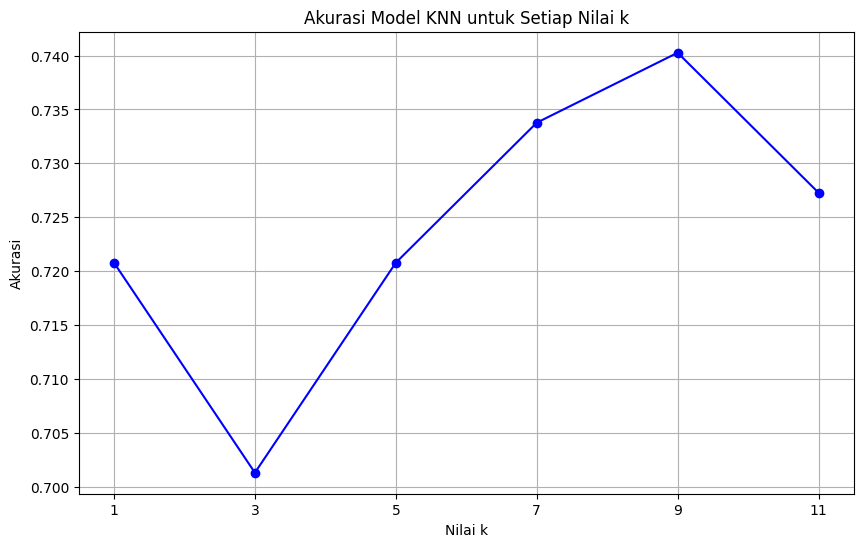


Akurasi untuk setiap nilai k:
k = 1: Akurasi = 0.7208
k = 3: Akurasi = 0.7013
k = 5: Akurasi = 0.7208
k = 7: Akurasi = 0.7338
k = 9: Akurasi = 0.7403
k = 11: Akurasi = 0.7273


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk setiap model KNN
accuracies = []
for k, model in knn_models.items():
    y_pred = model.predict(X_test_normalized)
    accuracy = accuracy_score(y_test_selected, y_pred)
    accuracies.append(accuracy)

# Membuat plot akurasi terhadap nilai k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Akurasi Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Menampilkan list akurasi untuk setiap nilai k
print("\nAkurasi untuk setiap nilai k:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Akurasi = {accuracy:.4f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

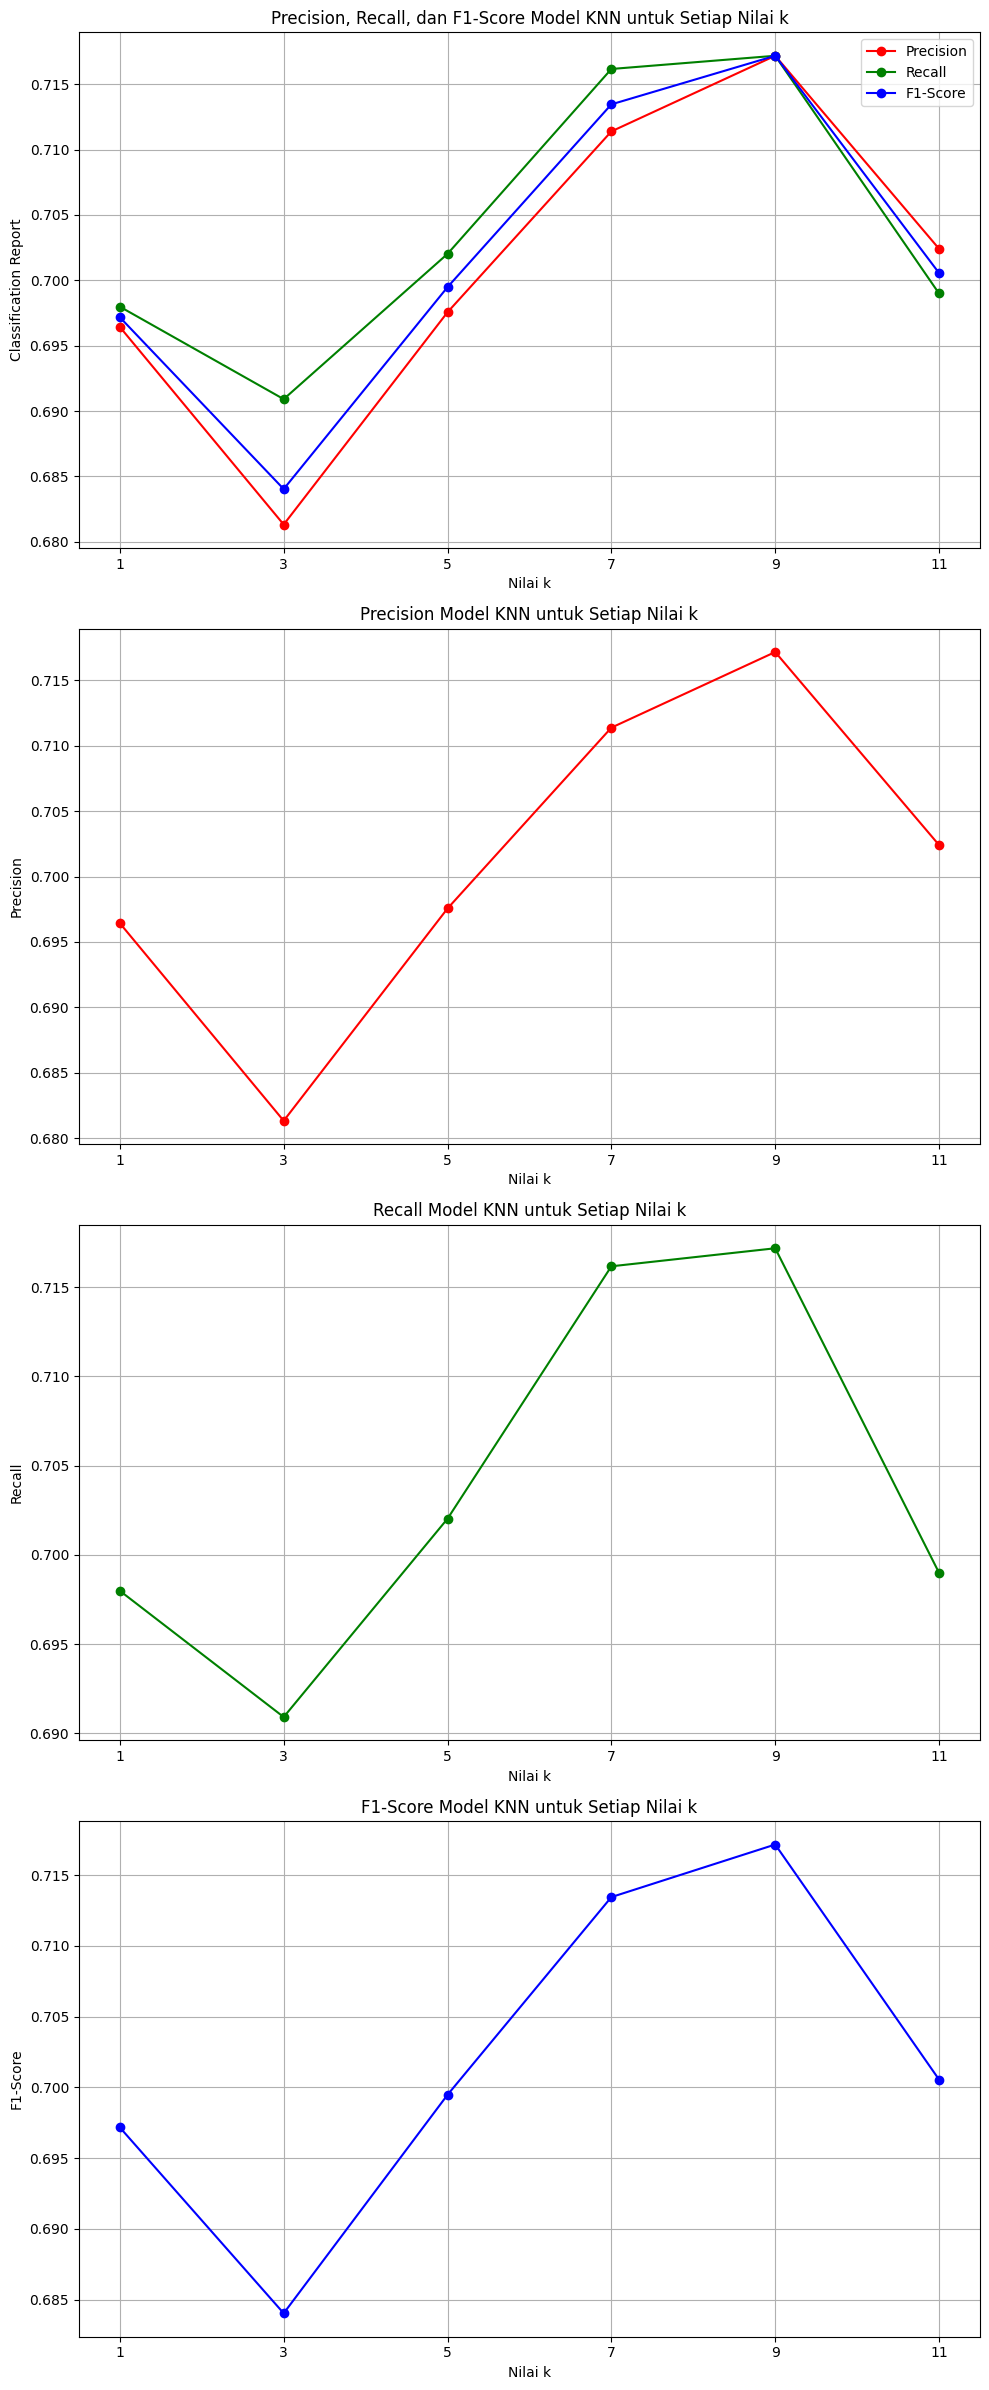


Precision, Recall, dan F1-Score untuk setiap nilai k:
k = 1: Precision = 0.6964, Recall = 0.6980, F1-Score = 0.6972
k = 3: Precision = 0.6813, Recall = 0.6909, F1-Score = 0.6840
k = 5: Precision = 0.6976, Recall = 0.7020, F1-Score = 0.6995
k = 7: Precision = 0.7114, Recall = 0.7162, F1-Score = 0.7135
k = 9: Precision = 0.7172, Recall = 0.7172, F1-Score = 0.7172
k = 11: Precision = 0.7024, Recall = 0.6990, F1-Score = 0.7006


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Menyimpan metrik precision, recall, dan f1-score untuk setiap model KNN
precisions = []
recalls = []
f1_scores = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test_normalized)
    
    # Menghitung precision, recall, dan f1-score dengan macro average
    precision = precision_score(y_test_selected, y_pred, average='macro')
    recall = recall_score(y_test_selected, y_pred, average='macro')
    f1 = f1_score(y_test_selected, y_pred, average='macro')
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Membuat subplots untuk menampilkan precision, recall, f1-score dan gabungannya
fig, axes = plt.subplots(4, 1, figsize=(10, 24))

# Precision, Recall, F1-Score plot (gabungan dalam satu grafik) di posisi pertama
axes[0].plot(k_values, precisions, marker='o', linestyle='-', color='r', label='Precision')
axes[0].plot(k_values, recalls, marker='o', linestyle='-', color='g', label='Recall')
axes[0].plot(k_values, f1_scores, marker='o', linestyle='-', color='b', label='F1-Score')
axes[0].set_title('Precision, Recall, dan F1-Score Model KNN untuk Setiap Nilai k')
axes[0].set_xlabel('Nilai k')
axes[0].set_ylabel('Classification Report')
axes[0].set_xticks(k_values)
axes[0].grid(True)
axes[0].legend()

# Precision plot
axes[1].plot(k_values, precisions, marker='o', linestyle='-', color='r')
axes[1].set_title('Precision Model KNN untuk Setiap Nilai k')
axes[1].set_xlabel('Nilai k')
axes[1].set_ylabel('Precision')
axes[1].set_xticks(k_values)
axes[1].grid(True)

# Recall plot
axes[2].plot(k_values, recalls, marker='o', linestyle='-', color='g')
axes[2].set_title('Recall Model KNN untuk Setiap Nilai k')
axes[2].set_xlabel('Nilai k')
axes[2].set_ylabel('Recall')
axes[2].set_xticks(k_values)
axes[2].grid(True)

# F1-score plot
axes[3].plot(k_values, f1_scores, marker='o', linestyle='-', color='b')
axes[3].set_title('F1-Score Model KNN untuk Setiap Nilai k')
axes[3].set_xlabel('Nilai k')
axes[3].set_ylabel('F1-Score')
axes[3].set_xticks(k_values)
axes[3].grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan nilai precision, recall, dan f1-score untuk setiap k
print("\nPrecision, Recall, dan F1-Score untuk setiap nilai k:")
for k, precision, recall, f1 in zip(k_values, precisions, recalls, f1_scores):
    print(f"k = {k}: Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")


# Hitung Specificity

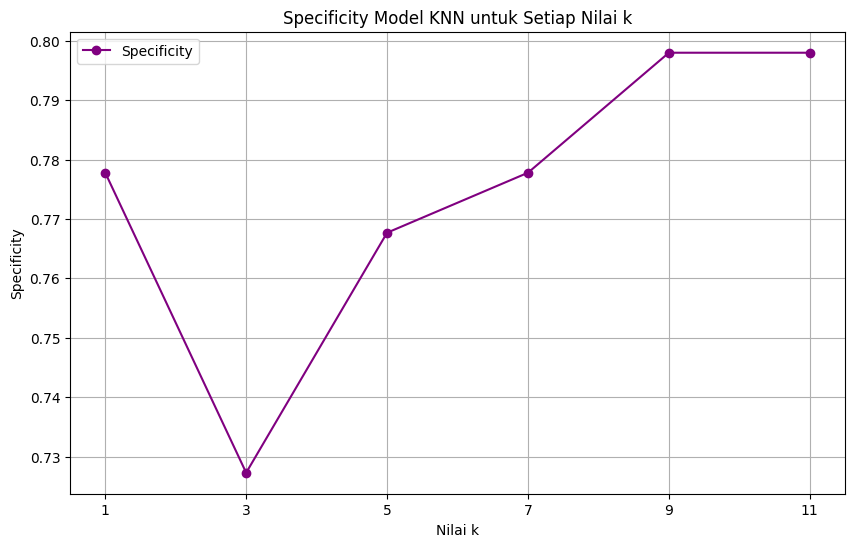


Specificity untuk setiap nilai k:
k = 1: Specificity = 0.7778
k = 3: Specificity = 0.7273
k = 5: Specificity = 0.7677
k = 7: Specificity = 0.7778
k = 9: Specificity = 0.7980
k = 11: Specificity = 0.7980


In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Menyimpan nilai Specificity untuk setiap model KNN
specificities = []

for k, model in knn_models.items():
    y_pred = model.predict(X_test_normalized)
    
    # Menghitung confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test_selected, y_pred).ravel()
    
    # Menghitung Specificity
    specificity = tn / (tn + fp)
    specificities.append(specificity)

# Membuat plot untuk Specificity terhadap nilai k
plt.figure(figsize=(10, 6))

# Plot Specificity
plt.plot(k_values, specificities, marker='o', linestyle='-', color='purple', label='Specificity')

# Menambahkan judul dan label
plt.title('Specificity Model KNN untuk Setiap Nilai k')
plt.xlabel('Nilai k')
plt.ylabel('Specificity')
plt.xticks(k_values)
plt.grid(True)

# Menambahkan legend
plt.legend()

# Menampilkan chart
plt.show()

# Menampilkan Specificity untuk setiap nilai k
print("\nSpecificity untuk setiap nilai k:")
for k, specificity in zip(k_values, specificities):
    print(f"k = {k}: Specificity = {specificity:.4f}")


# Hitung ROC-AUC

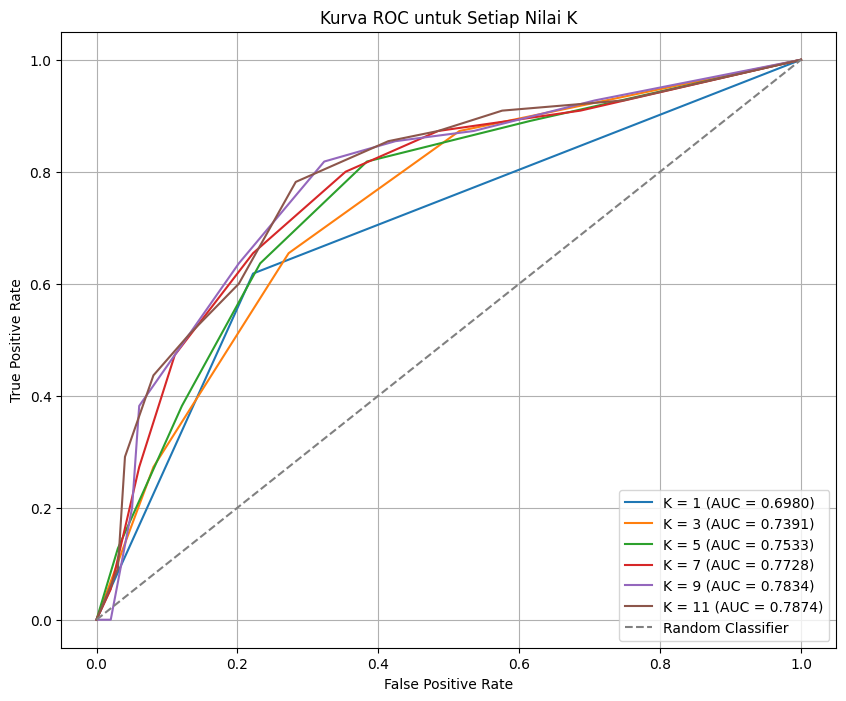


ROC AUC untuk setiap nilai k:
k = 1: ROC AUC = 0.6980
k = 3: ROC AUC = 0.7391
k = 5: ROC AUC = 0.7533
k = 7: ROC AUC = 0.7728
k = 9: ROC AUC = 0.7834
k = 11: ROC AUC = 0.7874


In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Menampilkan ROC AUC dan kurva ROC untuk setiap model KNN
plt.figure(figsize=(10, 8))

# Menyimpan hasil AUC untuk dicetak setelah plot
auc_scores = []

for k, model in knn_models.items():
    # Prediksi probabilitas untuk kelas positif
    y_prob = model.predict_proba(X_test_normalized)[:, 1]
    
    # Hitung ROC AUC
    auc_score = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Simpan skor AUC
    auc_scores.append((k, auc_score))
    
    # Plot kurva ROC
    plt.plot(fpr, tpr, label=f'K = {k} (AUC = {auc_score:.4f})')

# Menambahkan elemen-elemen plot
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC untuk Setiap Nilai K')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Menampilkan ROC AUC untuk setiap nilai k
print("\nROC AUC untuk setiap nilai k:")
for k, auc_score in auc_scores:
    print(f"k = {k}: ROC AUC = {auc_score:.4f}")


# Confusion Matrix


Confusion Matrix untuk k = 1:
True Negative (TN): 77
False Positive (FP): 22
False Negative (FN): 21
True Positive (TP): 34


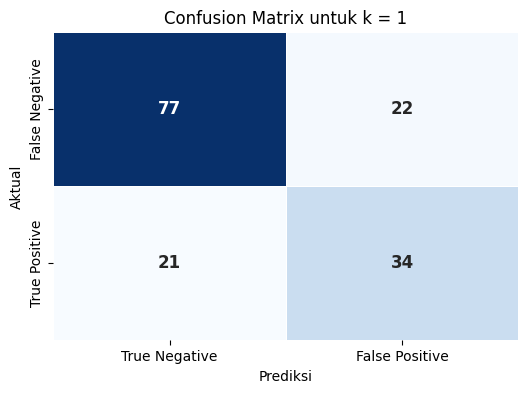


Confusion Matrix untuk k = 3:
True Negative (TN): 72
False Positive (FP): 27
False Negative (FN): 19
True Positive (TP): 36


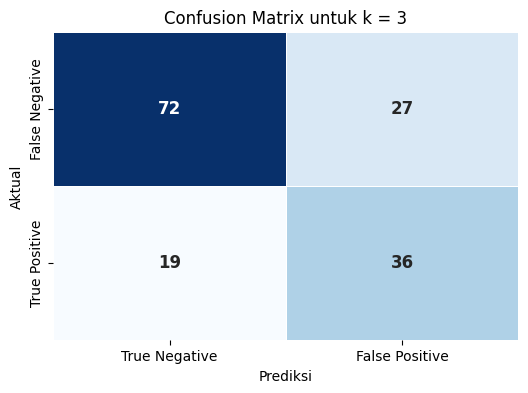


Confusion Matrix untuk k = 5:
True Negative (TN): 76
False Positive (FP): 23
False Negative (FN): 20
True Positive (TP): 35


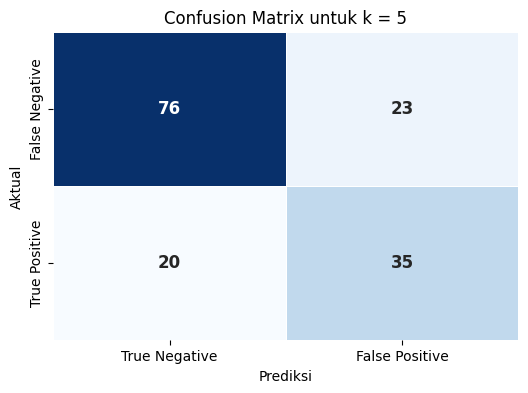


Confusion Matrix untuk k = 7:
True Negative (TN): 77
False Positive (FP): 22
False Negative (FN): 19
True Positive (TP): 36


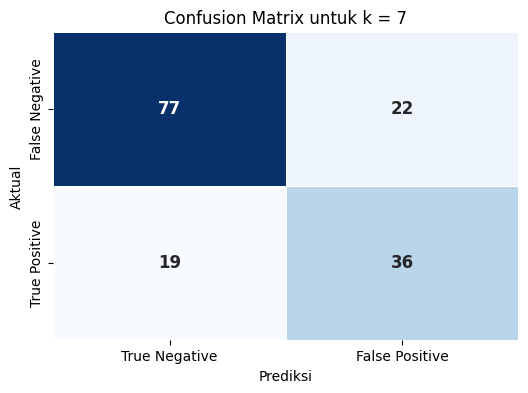


Confusion Matrix untuk k = 9:
True Negative (TN): 79
False Positive (FP): 20
False Negative (FN): 20
True Positive (TP): 35


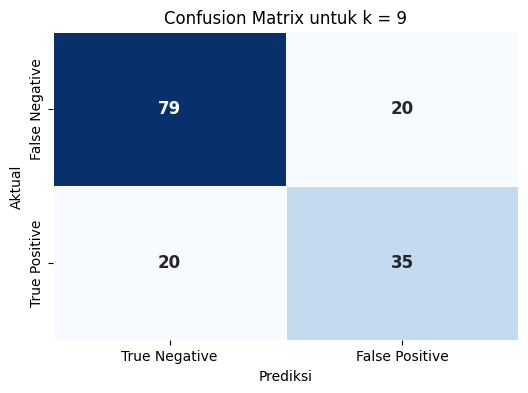


Confusion Matrix untuk k = 11:
True Negative (TN): 79
False Positive (FP): 20
False Negative (FN): 22
True Positive (TP): 33


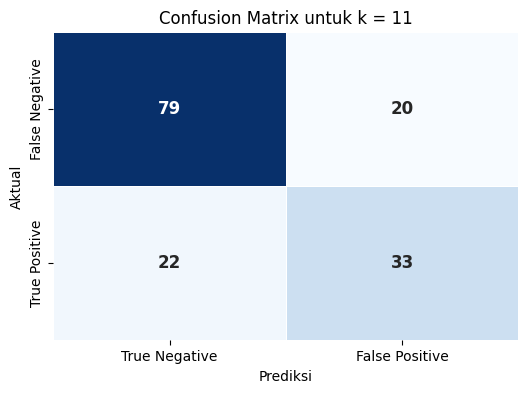

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan confusion matrix untuk setiap model KNN
for k, model in knn_models.items():
    print(f"\nConfusion Matrix untuk k = {k}:")
    y_pred = model.predict(X_test_normalized)
    cm = confusion_matrix(y_test, y_pred)
    
    # Menampilkan nilai TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negative (TN): {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP): {tp}")
    
    # Menampilkan confusion matrix dengan heatmap dan label
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Negative', 'False Positive'],
                yticklabels=['False Negative', 'True Positive'], annot_kws={"size": 12, 'weight': 'bold'}, cbar=False, linewidths=0.5)
    
    # Menambahkan label di dalam heatmap
    plt.title(f"Confusion Matrix untuk k = {k}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.show()
